### Comensais do Restaurante Universitário da Universidade Federal do Ceará (RU-UFC)

#### Carregamento das Variáveis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

restaurant_users = pd.DataFrame(pd.read_csv("comensais.csv")) #comensais do RU
students = pd.DataFrame(pd.read_csv("estudantes-matriculados-graduacao.csv"))

meals_counters = pd.DataFrame({"amounts": { #contagem das refeições
    "desjejum": len(restaurant_users[restaurant_users["tipo_refeicao"] == "Café da Manhã"]),
    "almoço": len(restaurant_users[restaurant_users["tipo_refeicao"] == "Almoço"]),
    "jantar": len(restaurant_users[restaurant_users["tipo_refeicao"] == "Jantar"]),
}})

users_grouped = restaurant_users[["vinculo_comensal", "quantidade_refeicao"]].groupby(by="vinculo_comensal").sum() #agrupador por vínculo
users_type = users_grouped.rename(index={"AUXILIO_CONCLUDENTE": "Auxílio Concludente", "AUXILIO_MORADIA": "Auxílio Moradia", "DISCENTE": "Discentes", "ISENCAO_INGRESSANTE": "Ingressantes Isentos", "ISENCAO_PARCIAL": "Isentos Parciais", "ISENCAO_TOTAL": "Isentos Totais", "RESIDENTE": "Residentes"}) #renomeador de índices (rótulos)

students_users = pd.merge(restaurant_users, students, how="inner", on="cpf_cnpj")
students_users_origins = students_users[["uf_naturalidade", "quantidade_refeicao"]].groupby(by="uf_naturalidade").sum()

,quantidade_refeicao
uf_naturalidade,
AC,1579
AL,1117
AM,4362
AP,1603
BA,11853
CE,1719961
DF,5517
ES,652
GO,2776


### Informações Gerais do Estudantes

#### Quanto à nacionalidade

In [9]:
students_users_nationality = students_users[students_users["tipo_nacionalidade"] == "Estrangeiro"]
foreign_countries = students_users_nationality[["pais_nacionalidade", "quantidade_refeicao"]].groupby(by="pais_nacionalidade").sum()
display(foreign_countries)

,quantidade_refeicao
pais_nacionalidade,
ANGOLANA,1203
BENINENSE,2
CABO-VERDIANA,2508
CONGOLESA,325
GABONESA,456
GANENSE,113
GUINEENSE,1673
HAITIANA,316
JAMAICANA,2


#### Quanto à etnia

#### Plotagem de Gráficos

##### Comensais do Restaurante Universitário por Vínculo

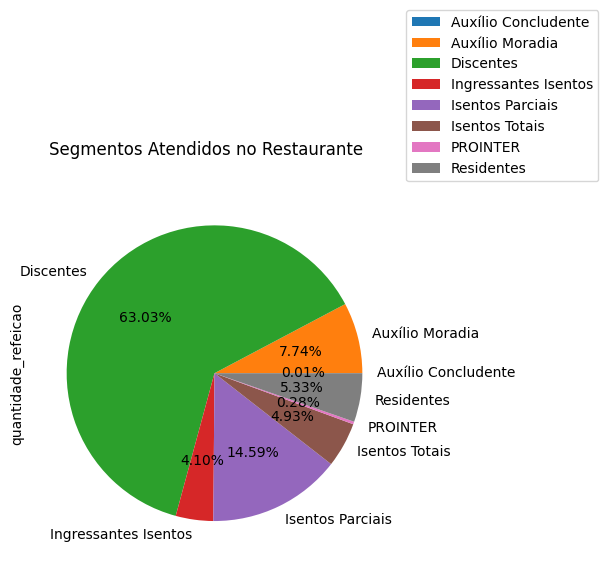

In [2]:
users_type.plot(kind="pie", title="Segmentos Atendidos no Restaurante", subplots=True, autopct="%.2f%%")
plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
plt.show()

#### Contagem das Refeições por Tipo

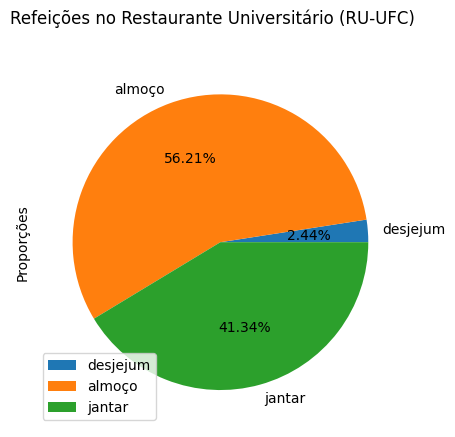

In [3]:
meals_counters.plot(kind="pie", title="Refeições no Restaurante Universitário (RU-UFC)", subplots=True, ylabel="Proporções", autopct="%.2f%%")
plt.show()

### Proporção de Comensais por Unidade Federativa

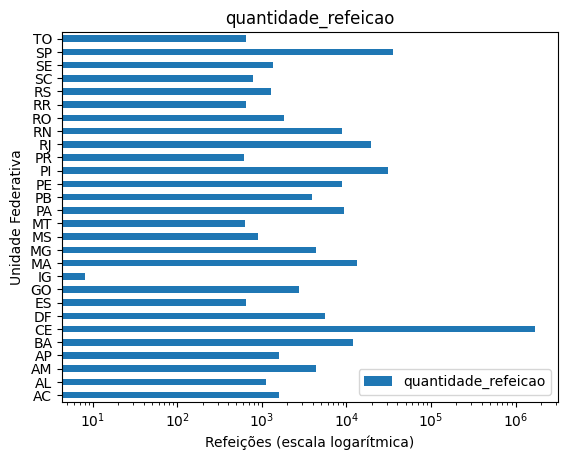

In [4]:
students_users_origins.plot(kind="barh",subplots=True, ylabel="Unidade Federativa", xlabel="Refeições (escala logarítmica)", logx=True)
plt.show()